<a href="https://colab.research.google.com/github/Isaac-Gathere/DATA-SCIENCE/blob/main/Income_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:


# read the CSV file into a Pandas dataframe
df = pd.read_csv(r'/Income_Data.csv')

In [5]:
# convert the 'Months' column to a datetime object
df['Months'] = pd.to_datetime(df['Months'], format='%b-%y')


In [6]:
# define the independent variables (COVID-related measures)
X = df[['Loans', 'Investment Securities', 'Other Interest Income', 'Deposits', 'Borrowed Funds',
        'Asset Management and Brokerage', 'Capital Markets and Advisory', 'Card and Cash Management',
        'Lending and Deposit Services', 'Residential and commercial mortgage', 'Other Non-interest income',
        'Recapture of credit losses']]

In [7]:
# check for missing values in X
print(pd.isna(X).sum())

Loans                                  0
Investment Securities                  0
Other Interest Income                  0
Deposits                               0
Borrowed Funds                         0
Asset Management and Brokerage         0
Capital Markets and Advisory           0
Card and Cash Management               0
Lending and Deposit Services           0
Residential and commercial mortgage    0
Other Non-interest income              0
Recapture of credit losses             0
dtype: int64


In [8]:
print(df.head())


      Months  Loans  Investment Securities  Other Interest Income  Deposits  \
0 2019-01-01  10730                   3003                    897      1823   
1 2019-02-01  10478                   2744                   1272      1758   
2 2019-03-01  10810                   2379                   1409      2094   
3 2019-04-01  14543                   2404                   1094      2300   
4 2019-05-01   9932                   3350                   1423      2681   

   Borrowed Funds  Asset Management and Brokerage  \
0            2850                            1037   
1            3079                             722   
2            2901                            1183   
3            2944                             736   
4            2361                             998   

   Capital Markets and Advisory  Card and Cash Management  \
0                          1812                      2594   
1                          2302                      3461   
2                      

In [9]:
# create a new column for the year
df['year'] = df['Months'].dt.year

In [10]:
# create dummy variables for lockdowns, stimulus, and vaccines
df['lockdown'] = np.where(df['year'] == 2020, 1, 0)
df['stimulus'] = np.where((df['year'] == 2020) & (df['Months'].dt.quarter == 2), 1, 0)
df['vaccines'] = np.where((df['year'] == 2021) & (df['Months'].dt.quarter == 1), 1, 0)


In [11]:
# Drop any rows with missing values
df.dropna(inplace=True)

In [ ]:
# perform linear regression with OLS
X = df[['lockdown', 'stimulus', 'vaccines']]
y = df['Gross income from continuing operations']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# print regression summary
print(model.summary())

In [13]:
# print(df.head())

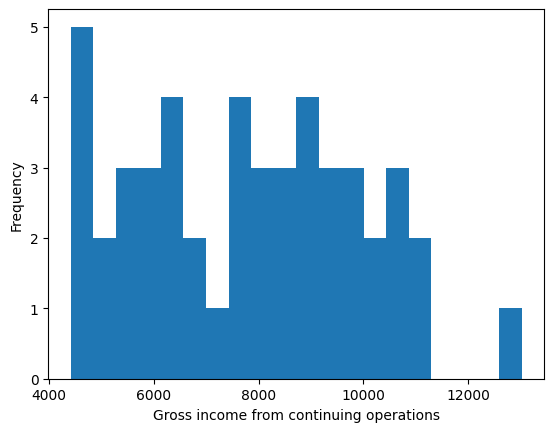

In [14]:
# plot the distribution of the dependent variable
plt.hist(df['Gross income from continuing operations'], bins=20)
plt.xlabel('Gross income from continuing operations')
plt.ylabel('Frequency')
plt.show()


#### The most occuring gross income from continuing operations is below 6000

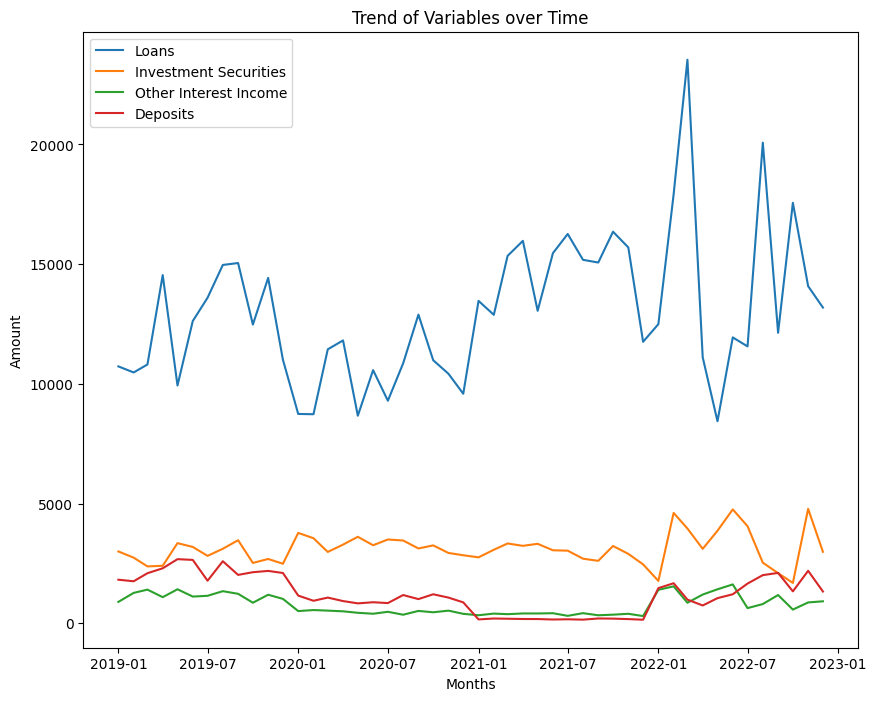

In [15]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Loans'], label='Loans')
plt.plot(df['Months'], df['Investment Securities'], label='Investment Securities')
plt.plot(df['Months'], df['Other Interest Income'], label='Other Interest Income')
plt.plot(df['Months'], df['Deposits'], label='Deposits')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


#### The x-axis shows the time (months) and the y-axis shows the amount of each variable

### From the chart the trend increased highly in Loans from 2019 to 2023  while in other interest income it was significantly low

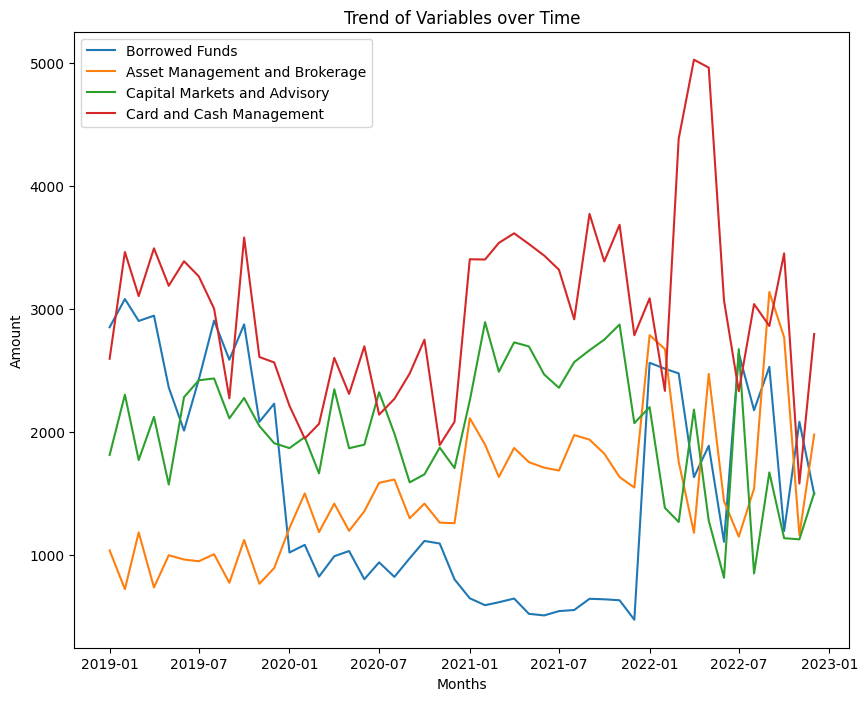

In [16]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Borrowed Funds'], label='Borrowed Funds')
plt.plot(df['Months'], df['Asset Management and Brokerage'], label='Asset Management and Brokerage')
plt.plot(df['Months'], df['Capital Markets and Advisory'], label='Capital Markets and Advisory')
plt.plot(df['Months'], df['Card and Cash Management'], label='Card and Cash Management')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


### The other highest trend was in card and cash management and a significant decrease in borrowed funds between 2020 and 2022

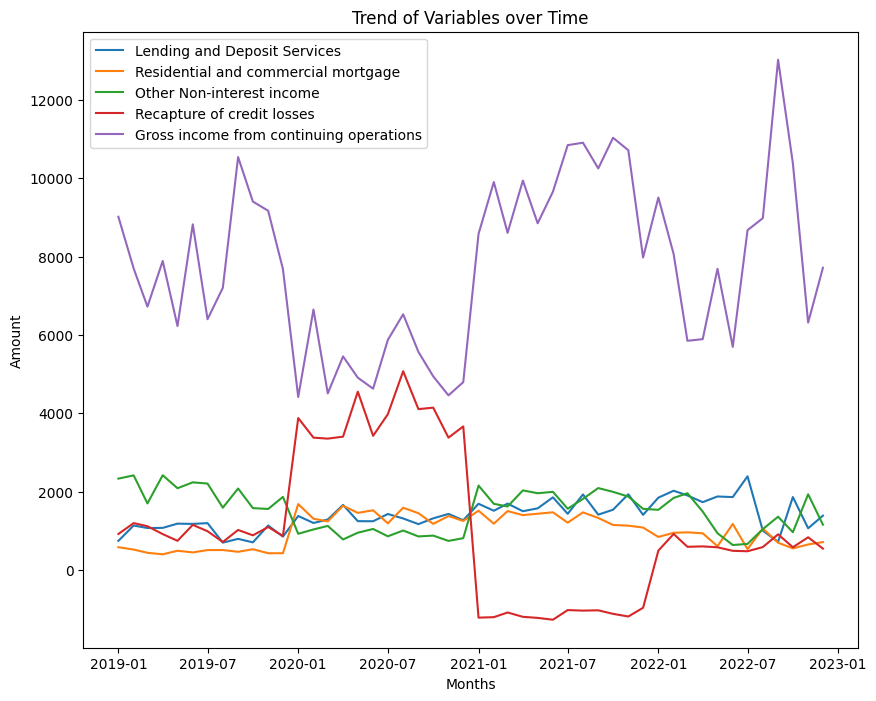

In [17]:
# plot the trend of each variable over time
plt.figure(figsize=(10, 8))
plt.plot(df['Months'], df['Lending and Deposit Services'], label='Lending and Deposit Services')
plt.plot(df['Months'], df['Residential and commercial mortgage'], label='Residential and commercial mortgage')
plt.plot(df['Months'], df['Other Non-interest income'], label='Other Non-interest income')
plt.plot(df['Months'], df['Recapture of credit losses'], label='Recapture of credit losses')
plt.plot(df['Months'], df['Gross income from continuing operations'], label='Gross income from continuing operations')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Trend of Variables over Time')
plt.legend()
plt.show()


### Th Gross income from continuing Operation Increased highly from 2021 to 2022

### there was a decrease in Recapture of Credit losses between 2021 and 2022


In [18]:
loans_by_year = df.groupby('year')['Loans'].sum()
print(loans_by_year)


year
2019    150640
2020    124029
2021    176502
2022    174045
Name: Loans, dtype: int64


In [19]:
highest_loans_year = loans_by_year.idxmax()
print("The year with the highest loans is", int(highest_loans_year))


The year with the highest loans is 2021


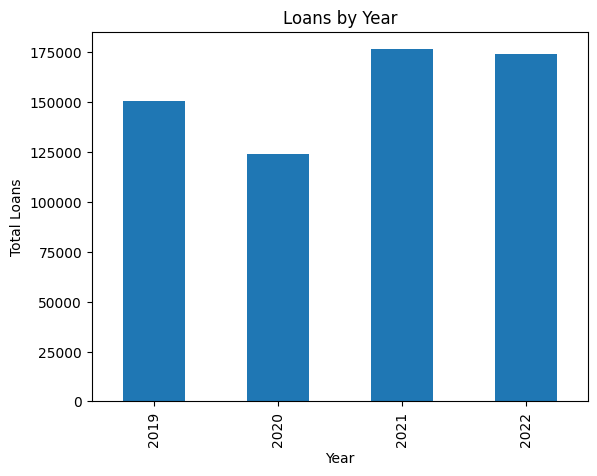

In [20]:
loans_by_year.plot(kind='bar', xlabel='Year', ylabel='Total Loans', title='Loans by Year')
# plot the total loans by year
loans_by_year.plot(kind='bar', xlabel='Year', ylabel='Total Loans', title='Loans by Year')

# show the plot
plt.show()

In [21]:
# create a subset of the data with just the numerical columns
numerical_data = df.select_dtypes(include=[np.number])

# split the data into the dependent variable (Loans) and independent variables
X = numerical_data.drop(['Loans'], axis=1)
y = numerical_data['Loans']

# add a constant to the independent variables for the regression
X = sm.add_constant(X)

# fit the OLS model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Loans   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     3.077
Date:                Wed, 10 May 2023   Prob (F-statistic):            0.00348
Time:                        07:44:19   Log-Likelihood:                -428.88
No. Observations:                  48   AIC:                             893.8
Df Residuals:                      30   BIC:                             927.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

#### The above is a summary of OLS (ordinary least squares) regression results.
#### OLS is a common method for estimating the parameters of a linear regression model.
#### The dependent variable in this case is 'Loans' and the model includes 17 independent variables.
#### The R-squared value of 0.636 indicates that the model explains 63.6% of the variation in the dependent variable.
#### The adjusted R-squared value of 0.429 takes into account the number of independent variables in the model.
#### The F-statistic of 3.077 and the corresponding p-value of 0.00348 suggest that the model as a whole is statistically significant.

#### This is the output of a linear regression model, which is a statistical technique used to analyze the relationship between a dependent variable (in this case, "Loans") and one or more independent variables (listed in the table)

In [22]:
# create a list of all variable names except for the first (index) and last (total) columns
variable_names = list(df.columns)[1:-1]

# create an empty dictionary to store the results
max_years = {}

# loop through each variable and find the year with the highest value
for var_name in variable_names:
    max_year = df[df[var_name] == df[var_name].max()]['year'].values[0]
    max_years[var_name] = max_year

# print the results
for var_name, max_year in max_years.items():
    print(f"The year with the highest value for {var_name} is {max_year}")


The year with the highest value for Loans is 2022
The year with the highest value for Investment Securities is 2022
The year with the highest value for Other Interest Income is 2022
The year with the highest value for Deposits is 2019
The year with the highest value for Borrowed Funds is 2019
The year with the highest value for Asset Management and Brokerage is 2022
The year with the highest value for Capital Markets and Advisory is 2021
The year with the highest value for Card and Cash Management is 2022
The year with the highest value for Lending and Deposit Services is 2022
The year with the highest value for Residential and commercial mortgage is 2020
The year with the highest value for Other Non-interest income is 2019
The year with the highest value for Recapture of credit losses is 2020
The year with the highest value for Gross income from continuing operations is 2022
The year with the highest value for Basic earnings per share from continuing operations is 2022
The year with t

In [23]:
# Calculate total profits for each year
df['Total Profits'] = df['Gross income from continuing operations'] - df['Other Non-interest income']
profits_by_year = df.groupby('year')['Total Profits'].sum()

# Find the year with the maximum profits
max_profit_year = profits_by_year.idxmax()
max_profit = profits_by_year[max_profit_year]


print(f"The year with the highest profits is {max_profit_year} with a total profit of ${max_profit:,.2f}")


The year with the highest profits is 2021 with a total profit of $94,813.00
